# Projeto #1 - Análise Exploratória de Dados

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) **(5%)** Qual a base escolhida e qual seu interesse nela?

*Indique o link da base no Kaggle e explique em um parágrafo curto por que essa base é interessante para você.*

https://www.kaggle.com/snocco/missing-migrants-project

Me interessei pela base, por possuir uma boa variedade de tipo de features, me permitindo aplicar os conhecimentos que estou adiquirindo no curso.

### 2) **(5%)** Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo).
- Identificação da variável a serem trabalhadas
- Classificação das variáveis como: contínua ou discreta.


As variáveis que serão trabalhadas são: 'REGIAO_INCIDENTE', 'ANO_INCIDENTE', 'MES_INCIDENTE, 'TOTAL_MIGRANTES_MORTOS','TOTAL_MIGRANTES_DESAPARECIDOS','TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS','QTDE_SOBREVIVENTES','QTDE_MULHERES','QTDE_HOMENS','QTDE_CRIANCAS'

Sua classificação é:

Contínuas: 'RANTES_DESAPARECIDOS','TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS','QTDE_SOBREVIVENTES','QTDE_MULHERES','QTDE_HOMENS','QTDE_CRIANCAS'

Discretas: 'ANO_INCIDENTE', 'ANO_INCIDENTE',''ANO_INCIDENTE', REGIAO_INCIDENTE', MES_INCIDENTE'
, HEMISFERIO

### 2) **(15%)** Faça uma avaliação descritiva da sua base. Quantas linhas ela possui? Quais os tipos de dados? Quantas e quais features possuem?

Cada variável escolhida pelo aluno precisa passar por ao menos 1 pré-processamento. O pré-processamento pode ser (mas não está limitado a):
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


In [1]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn import preprocessing


In [3]:
#migrantes = pd.read_csv("projeto_1/missing-migrants/MissingMigrants-Global.csv")
migrantes = pd.read_csv("missing-migrants/MissingMigrants-Global.csv")
"""
#para usar no colab nas salas de aula
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
arquivo_base = "/content/drive/My Drive/MissingMigrants-Global.csv"
migrantes = pd.read_csv(arquivo_base)
"""

'\n#para usar no colab nas salas de aula\nfrom google.colab import drive\ndrive.mount(\'/content/drive\', force_remount=True)\narquivo_base = "/content/drive/My Drive/MissingMigrants-Global.csv"\nmigrantes = pd.read_csv(arquivo_base)\n'

In [4]:
# Renomeando as features/colunas
migrantes.columns = ['ID', 'REGIAO_INCIDENTE','DATA_INCIDENTE','ANO_INCIDENTE','MES_INCIDENTE','TOTAL_MIGRANTES_MORTOS','TOTAL_MIGRANTES_DESAPARECIDOS','TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS','QTDE_SOBREVIVENTES','QTDE_MULHERES','QTDE_HOMENS','QTDE_CRIANCAS','CAUSA_MORTE','LOCAL_INCIDENTE','INFORMACOES_PESQUISA','COORDENADAS_LOCAL_INCIDENTE','ROTA_MIGRACAO','URL','GEOGRAFICO','QUALIDADE_PESQUISA']

In [6]:
migrantes.head(5) #visualização do dataset

,ID,REGIAO_INCIDENTE,DATA_INCIDENTE,ANO_INCIDENTE,MES_INCIDENTE,TOTAL_MIGRANTES_MORTOS,TOTAL_MIGRANTES_DESAPARECIDOS,TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS,QTDE_SOBREVIVENTES,QTDE_MULHERES,QTDE_HOMENS,QTDE_CRIANCAS,CAUSA_MORTE,LOCAL_INCIDENTE,INFORMACOES_PESQUISA,COORDENADAS_LOCAL_INCIDENTE,ROTA_MIGRACAO,URL,GEOGRAFICO,QUALIDADE_PESQUISA
0,51591,Mediterranean,"March 28, 2019",2019,Mar,NaN,2.0,2,36.0,NaN,2.0,NaN,Presumed drowning,"Off the coast of Chios, Greece",Hellenic Coast Guard via IOM Greece,"38.362368696592, 26.172509473654",Eastern Mediterranean,NaN,Uncategorized,5
1,51588,Mediterranean,"March 26, 2019",2019,Mar,4.0,NaN,4,11.0,3.0,NaN,1.0,Presumed drowning,"Off the coast of Ayvacık district, Çanakkale p...",Turkish Coast Guard via IOM Turkey,"39.441975591614, 26.378816195919",Eastern Mediterranean,http://bit.ly/2YmiPAN,Uncategorized,5
2,51589,Mediterranean,"March 26, 2019",2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,"Body recovered on Playa del Tarajal, Ceuta, Sp...","Ceuta al día, El Pueblo de Ceuta","35.871901875921, -5.343037665842",Western Mediterranean,"http://bit.ly/2uyj7qO, http://bit.ly/2uwj5zC",Uncategorized,3
3,51590,Mediterranean,"March 26, 2019",2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,"Body recovered on beach near Tetouan, Morocco ...",El Pueblo de Ceuta,"35.635115912988, -5.275650103548",Western Mediterranean,http://bit.ly/2uwj5zC,Uncategorized,1
4,51587,Central America,"March 25, 2019",2019,Mar,1.0,NaN,1,NaN,NaN,1.0,NaN,Fall from train,"Train tracks in Teacalco, Tlaxcala, Mexico","Megalópolis, Línea de contraste","19.334475177429, -98.069823987538",NaN,"http://bit.ly/2uvDIvH, http://bit.ly/2TXAFLS",Central America,3


In [10]:
migrantes.dtypes  #análise dos dados

ID                                        int64
REGIAO_INCIDENTE                         object
DATA_INCIDENTE                           object
ANO_INCIDENTE                             int64
MES_INCIDENTE                            object
TOTAL_MIGRANTES_MORTOS                  float64
TOTAL_MIGRANTES_DESAPARECIDOS           float64
TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS      int64
QTDE_SOBREVIVENTES                      float64
QTDE_MULHERES                           float64
QTDE_HOMENS                             float64
QTDE_CRIANCAS                           float64
CAUSA_MORTE                              object
LOCAL_INCIDENTE                          object
INFORMACOES_PESQUISA                     object
COORDENADAS_LOCAL_INCIDENTE              object
ROTA_MIGRACAO                            object
URL                                      object
GEOGRAFICO                               object
QUALIDADE_PESQUISA                        int64
dtype: object

In [11]:
migrantes.describe() #análise dos dados

,ID,ANO_INCIDENTE,TOTAL_MIGRANTES_MORTOS,TOTAL_MIGRANTES_DESAPARECIDOS,TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS,QTDE_SOBREVIVENTES,QTDE_MULHERES,QTDE_HOMENS,QTDE_CRIANCAS,QUALIDADE_PESQUISA
count,5333.000000,5333.000000,5142.000000,503.000000,5333.000000,749.000000,897.000000,2813.000000,644.000000,5333.000000
mean,43247.885805,2016.656104,3.287631,29.119284,5.916370,63.607477,2.012263,1.890864,2.476708,2.895556
std,5186.837212,1.237033,13.593407,67.913216,28.051811,146.520155,2.990100,5.510674,10.216220,1.423257
min,30158.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,40876.000000,2016.000000,1.000000,2.000000,1.000000,5.000000,1.000000,1.000000,1.000000,2.000000
50%,43504.000000,2017.000000,1.000000,7.000000,1.000000,15.000000,1.000000,1.000000,1.000000,2.000000
75%,45747.000000,2018.000000,2.000000,25.000000,3.000000,61.000000,2.000000,1.000000,2.000000,4.000000
max,51592.000000,2019.000000,750.000000,750.000000,1022.000000,1950.000000,30.000000,135.000000,250.000000,5.000000


In [ ]:
A base possui 5333 registros e 20 features.

Os registros são do tipo:
Inteiro: ID, ANO_INCIDENTE, TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS, QUALIDADE_PESQUISA
Object: REGIAO_INCIDENTE, DATA_INCIDENTE, MES_INCIDENTE, CAUSA_MORTE, LOCAL_INCIDENTE, INFORMACOES_PESQUISA, COORDENADAS_LOCAL_INCIDENTE,  ROTA_MIGRACAO, URL, GEOGRAFICO
Float: TOTAL_MIGRANTES_MORTOS, TOTAL_MIGRANTES_DESAPARECIDOS, QTDE_SOBREVIVENTES, QTDE_MULHERES, QTDE_HOMENS, QTDE_CRIANCAS

In [13]:
# Percentual das features que não possuem valor (dados faltantes):
(migrantes.isnull().sum() / migrantes.shape[0]).sort_values(ascending=False)

TOTAL_MIGRANTES_DESAPARECIDOS           0.905682
QTDE_CRIANCAS                           0.879242
QTDE_SOBREVIVENTES                      0.859554
QTDE_MULHERES                           0.831802
ROTA_MIGRACAO                           0.501219
QTDE_HOMENS                             0.472530
URL                                     0.401463
TOTAL_MIGRANTES_MORTOS                  0.035815
GEOGRAFICO                              0.002063
LOCAL_INCIDENTE                         0.001875
INFORMACOES_PESQUISA                    0.000375
COORDENADAS_LOCAL_INCIDENTE             0.000188
ANO_INCIDENTE                           0.000000
REGIAO_INCIDENTE                        0.000000
DATA_INCIDENTE                          0.000000
QUALIDADE_PESQUISA                      0.000000
MES_INCIDENTE                           0.000000
TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS    0.000000
CAUSA_MORTE                             0.000000
ID                                      0.000000
dtype: float64

In [6]:
#Eliminação das colunas que não são de interesse: ID, INFORMACOES_PESQUISA, COORDENADAS_LOCAL_INCIDENTE, URL, QUALIDADE_PESQUISA, DATA_INCIDENTE.
migrantes.drop(['ID','INFORMACOES_PESQUISA','COORDENADAS_LOCAL_INCIDENTE','URL','QUALIDADE_PESQUISA','DATA_INCIDENTE'],axis = 1, inplace = True)

In [5]:
# Checagem se os valores estão dentro de um limite permitido ou razoável.
# Substituição dos dados ausentes/faltantes com 'zero' de algumas colunas que serão utilizadas na análise. 

migrantes['TOTAL_MIGRANTES_DESAPARECIDOS'].fillna(0, inplace=True)
migrantes['QTDE_CRIANCAS'].fillna(0, inplace=True)
migrantes['QTDE_SOBREVIVENTES'].fillna(0, inplace=True)
migrantes['QTDE_MULHERES'].fillna(0, inplace=True)
migrantes['QTDE_HOMENS'].fillna(0, inplace=True)
migrantes['TOTAL_MIGRANTES_MORTOS'].fillna(0, inplace=True)

# ver a porcentagem dos valores faltantes após preenchimento dos valores faltantes
(migrantes.isnull().sum() / migrantes.shape[0]).sort_values(ascending=False)

ROTA_MIGRACAO                           0.501219
URL                                     0.401463
GEOGRAFICO                              0.002063
LOCAL_INCIDENTE                         0.001875
INFORMACOES_PESQUISA                    0.000375
COORDENADAS_LOCAL_INCIDENTE             0.000188
QUALIDADE_PESQUISA                      0.000000
TOTAL_MIGRANTES_DESAPARECIDOS           0.000000
REGIAO_INCIDENTE                        0.000000
DATA_INCIDENTE                          0.000000
ANO_INCIDENTE                           0.000000
MES_INCIDENTE                           0.000000
TOTAL_MIGRANTES_MORTOS                  0.000000
QTDE_MULHERES                           0.000000
TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS    0.000000
QTDE_SOBREVIVENTES                      0.000000
QTDE_HOMENS                             0.000000
QTDE_CRIANCAS                           0.000000
CAUSA_MORTE                             0.000000
ID                                      0.000000
dtype: float64

In [16]:
migrantes.dtypes

REGIAO_INCIDENTE                         object
ANO_INCIDENTE                             int64
MES_INCIDENTE                            object
TOTAL_MIGRANTES_MORTOS                  float64
TOTAL_MIGRANTES_DESAPARECIDOS           float64
TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS      int64
QTDE_SOBREVIVENTES                      float64
QTDE_MULHERES                           float64
QTDE_HOMENS                             float64
QTDE_CRIANCAS                           float64
CAUSA_MORTE                              object
LOCAL_INCIDENTE                          object
ROTA_MIGRACAO                            object
GEOGRAFICO                               object
dtype: object

In [7]:
# Conversão do tipo de dados.
# A feature MES_INCIDENTE será convertida para inteiro.

migrantes['MES_INCIDENTE'] = migrantes['MES_INCIDENTE'].map({
    'Jan': 1, 
    'Feb': 2,
    'Mar': 3, 
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Out': 10,
    'Nov': 11,
    'Dec': 12})

In [8]:
# Criando a coluna HEMISFERIO
migrantes['HEMISFERIO'] = migrantes['REGIAO_INCIDENTE'].map({
    'Caribbean': 'NORTE',
    'Central Asia': 'NORTE',
    'East Asia': 'NORTE',
    'Europe	norte': 'NORTE',
    'Mediterranean': 'NORTE',
    'Middle East': 'NORTE',
    'Europe': 'NORTE',
    'North Africa': 'NORTE',
    'North America': 'NORTE',
    'South Asia': 'NORTE',
    'Southeast Asia': 'NORTE',
    'Sub-Saharan Africa': 'NORTE',
    'US-Mexico Border': 'NORTE',
    'Central America': 'NORTE',
    'Horn of Africa': 'SUL',
    'South America': 'SUL'})

In [9]:
migrantes.head(30)

,REGIAO_INCIDENTE,ANO_INCIDENTE,MES_INCIDENTE,TOTAL_MIGRANTES_MORTOS,TOTAL_MIGRANTES_DESAPARECIDOS,TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS,QTDE_SOBREVIVENTES,QTDE_MULHERES,QTDE_HOMENS,QTDE_CRIANCAS,CAUSA_MORTE,LOCAL_INCIDENTE,ROTA_MIGRACAO,GEOGRAFICO,HEMISFERIO
0,Mediterranean,2019,3.0,0.0,2.0,2,36.0,0.0,2.0,0.0,Presumed drowning,"Off the coast of Chios, Greece",Eastern Mediterranean,Uncategorized,NORTE
1,Mediterranean,2019,3.0,4.0,0.0,4,11.0,3.0,0.0,1.0,Presumed drowning,"Off the coast of Ayvacık district, Çanakkale p...",Eastern Mediterranean,Uncategorized,NORTE
2,Mediterranean,2019,3.0,1.0,0.0,1,0.0,0.0,0.0,0.0,Presumed drowning,"Body recovered on Playa del Tarajal, Ceuta, Sp...",Western Mediterranean,Uncategorized,NORTE
3,Mediterranean,2019,3.0,1.0,0.0,1,0.0,0.0,0.0,0.0,Presumed drowning,"Body recovered on beach near Tetouan, Morocco ...",Western Mediterranean,Uncategorized,NORTE
4,Central America,2019,3.0,1.0,0.0,1,0.0,0.0,1.0,0.0,Fall from train,"Train tracks in Teacalco, Tlaxcala, Mexico",NaN,Central America,NORTE
5,US-Mexico Border,2019,3.0,1.0,0.0,1,0.0,0.0,0.0,0.0,Unknown (skeletal remains),"Pima County jurisdiction, Arizona, USA",NaN,Northern America,NORTE
6,US-Mexico Border,2019,3.0,1.0,0.0,1,0.0,0.0,0.0,0.0,Unknown (skeletal remains),"Pima County jurisdiction, Arizona, USA",NaN,Northern America,NORTE
7,Southeast Asia,2019,3.0,8.0,2.0,10,0.0,1.0,0.0,0.0,Vehicle Accident,"Sa Setthi intersection in Tambon Ban Mai, Tha ...",NaN,South-eastern Asia,NORTE
8,Mediterranean,2019,3.0,4.0,4.0,8,0.0,3.0,5.0,0.0,Presumed drowning,"Off the coast of Sfax, Tunisia",Central Mediterranean,Uncategorized,NORTE
9,US-Mexico Border,2019,3.0,1.0,0.0,1,0.0,0.0,0.0,0.0,Unknown (skeletal remains),"Pima County jurisdiction, Arizona, USA",NaN,Northern America,NORTE


### 4) **(60%)** Nos blocos seguintes construa análises que vão justificar suas conclusões.

#### 4.1) **(20%)** Análise 1 -  Distribuição dos valores para cada uma das variáveis
- Exemplo para variável contínua: se o conjunto de dados possui a variável "idade". Quantos % possui a idade entre 0 e 30 anos? 31 a 59? 60+?

- Exemplo para variável discreta: se o conjunto de dados possui a variável "gênero", quantos % do conjunto de dados é do sexo feminino, quantos % é masculino? Inclua outros gêneros se houver.


In [ ]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

In [9]:
# variaveis discretas 'ANO_INCIDENTE'
# A maior frequencia acontece no ano de 2018, 28%
migrantes.ANO_INCIDENTE.value_counts(normalize=True)

2018    0.282393
2017    0.254266
2016    0.239077
2015    0.151509
2014    0.045940
2019    0.026814
Name: ANO_INCIDENTE, dtype: float64

In [20]:
# variaveis discretas REGIAO_INCIDENTE'
# a região com a maior frequencia é US-Mexico Border, 25%, bem próximo ao Norte da Ágrica, 23%
migrantes.REGIAO_INCIDENTE.value_counts(normalize=True)

US-Mexico Border      0.250703
North Africa          0.232327
Mediterranean         0.184512
Sub-Saharan Africa    0.089068
Central America       0.057941
Europe                0.046690
Horn of Africa        0.044065
Middle East           0.030752
South Asia            0.028314
Southeast Asia        0.018001
Caribbean             0.011063
South America         0.005250
East Asia             0.000938
North America         0.000188
Central Asia          0.000188
Name: REGIAO_INCIDENTE, dtype: float64

In [27]:
# variaveis discretas MES_INCIDENTE'
# A maior frequencia acontece no mês 6-Junho, 10,7%, seguido de perto pelo mês de 7-setembro, 10,5% 

migrantes.MES_INCIDENTE.value_counts(normalize=True)

6.0     0.107173
9.0     0.105296
8.0     0.098624
1.0     0.097998
7.0     0.097164
12.0    0.096747
2.0     0.084237
11.0    0.082986
5.0     0.082152
3.0     0.081109
4.0     0.066514
Name: MES_INCIDENTE, dtype: float64

In [11]:
# variaveis discretas ANO, está distribuída:
# 2018 foi o ano com maior quantidade de incidentes, 28%.

migrantes.ANO_INCIDENTE.value_counts(normalize=True)

2018    0.282393
2017    0.254266
2016    0.239077
2015    0.151509
2014    0.045940
2019    0.026814
Name: ANO_INCIDENTE, dtype: float64

In [31]:
# variaveis discretas HEMISFERIO, está distribuída:
# O hemisfério norte aparece quase que na maioria dos registros, 95%.

migrantes.HEMISFERIO.value_counts(normalize=True)

NORTE    0.950684
SUL      0.049316
Name: HEMISFERIO, dtype: float64

In [23]:
# Variável: TOTAL_MIGRANTES_MORTOS
# observamos que em 61% dos incidentes, houve pelo menos `1` morto em 12%, houve 2 mortos
migrantes.TOTAL_MIGRANTES_MORTOS.value_counts(normalize=True)

1.0      0.617476
2.0      0.128446
3.0      0.066942
0.0      0.036940
4.0      0.026064
           ...   
106.0    0.000188
251.0    0.000188
97.0     0.000188
62.0     0.000188
204.0    0.000188
Name: TOTAL_MIGRANTES_MORTOS, Length: 73, dtype: float64

In [22]:
# Variável: TOTAL_MIGRANTES_DESAPARECIDOS
# observamos que em 91% dos incidentes, houve pelo menos `0` desaparecidos e 1% houve 2 desaparecidos
migrantes.TOTAL_MIGRANTES_DESAPARECIDOS.value_counts(normalize=True)

0.0      0.914682
1.0      0.011813
2.0      0.008438
3.0      0.006938
4.0      0.004125
           ...   
38.0     0.000188
76.0     0.000188
102.0    0.000188
47.0     0.000188
307.0    0.000188
Name: TOTAL_MIGRANTES_DESAPARECIDOS, Length: 105, dtype: float64

In [21]:
# Variável: TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS
# observamos que em 61% dos incidentes, houve pelo menos 1 migrante morto ou desaparecido e 12% houve 2 mortos e/ou desaparecidos
migrantes.TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS.value_counts(normalize=True)

1      0.613163
2      0.127695
3      0.067129
4      0.025314
5      0.022689
         ...   
99     0.000188
103    0.000188
111    0.000188
135    0.000188
459    0.000188
Name: TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS, Length: 120, dtype: float64

In [19]:
# Variável: QTDE_MULHERES
# observamos que na maiorias dos incidentes, `0` mulheres morreram e uma morreu em 11% dos incidentes
migrantes.QTDE_MULHERES.value_counts(normalize=True)

0.0     0.832177
1.0     0.119820
2.0     0.025502
3.0     0.005625
4.0     0.003750
6.0     0.002250
5.0     0.002063
8.0     0.001500
9.0     0.001125
11.0    0.000938
7.0     0.000938
15.0    0.000750
18.0    0.000563
10.0    0.000563
12.0    0.000563
30.0    0.000375
17.0    0.000375
13.0    0.000375
20.0    0.000188
23.0    0.000188
25.0    0.000188
21.0    0.000188
Name: QTDE_MULHERES, dtype: float64

In [16]:
# variavel: QTDE_HOMENS
# observamos que na maiorias dos incidentes, `0` homens morreram e um morreu em 42% dos incidentes
migrantes.QTDE_HOMENS.value_counts(normalize=True)

0.0      0.472717
1.0      0.427902
2.0      0.054191
3.0      0.014251
4.0      0.007125
5.0      0.005438
8.0      0.002438
7.0      0.002250
6.0      0.002250
9.0      0.001500
13.0     0.000938
11.0     0.000938
10.0     0.000938
17.0     0.000938
15.0     0.000750
31.0     0.000375
12.0     0.000375
27.0     0.000375
14.0     0.000375
22.0     0.000188
24.0     0.000188
95.0     0.000188
21.0     0.000188
49.0     0.000188
70.0     0.000188
77.0     0.000188
29.0     0.000188
46.0     0.000188
42.0     0.000188
19.0     0.000188
92.0     0.000188
45.0     0.000188
25.0     0.000188
74.0     0.000188
135.0    0.000188
91.0     0.000188
41.0     0.000188
59.0     0.000188
37.0     0.000188
26.0     0.000188
Name: QTDE_HOMENS, dtype: float64

In [17]:
# Variável: QTDE_CRIANCAS
# observamos que na maiorias dos incidentes, `0` criancas morreram e um morreu em 0.8% dos incidentes
migrantes.QTDE_CRIANCAS.value_counts(normalize=True)


0.0      0.879430
1.0      0.082693
2.0      0.015376
3.0      0.007500
5.0      0.003375
4.0      0.003000
6.0      0.002625
10.0     0.001313
11.0     0.001313
7.0      0.001125
20.0     0.000563
9.0      0.000375
15.0     0.000375
8.0      0.000375
29.0     0.000188
40.0     0.000188
250.0    0.000188
Name: QTDE_CRIANCAS, dtype: float64

#### 4.2) **(20%)** Análise 2 - Dependência entre variáveis
O aluno deve apresentar as mesmas distribuições para cada valor da variável dependente. Exemplo: Em um conjunto de dados em que as variáveis independentes são idade e sexo, e a variável dependente é renda. O aluno pode dividir a renda em 3 "grupos", <1000 reais, entre 1000 e 10000 reais e >1000 reais. Para cada um desses grupos, é necessário apresentar a distribuição das variáveis "idade" e "sexo".


In [ ]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

Text(0.5, 1.0, 'Qtde de mortos e desaparecidos por ano')

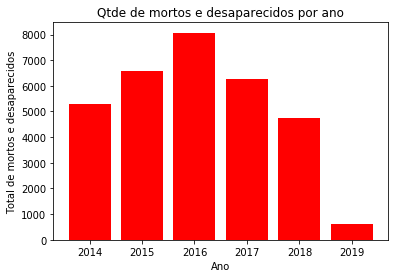

In [34]:
# Qual ano teve mais mortos ou desaparecidos?
# A partir do gráfico abaixo, observamos que o ano com maior quantidade de mortos e/ou desaparecidos foi 2016.
x = migrantes.groupby('ANO_INCIDENTE').sum()
x = x.reset_index()

plt.bar(x.ANO_INCIDENTE,x.TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS,color='red')

plt.xlabel("Ano")
plt.ylabel("Total de mortos e desaparecidos")
plt.title("Qtde de mortos e desaparecidos por ano")

Text(0.5, 1.0, 'Mortos e desaparecidos por região')

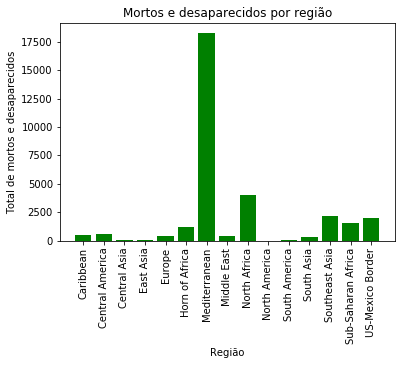

In [35]:
# Qual região teve mais migrantes mortos e desaparecidos?
# A partir do gráfico abaixo, observamos que a região com maior mortos e/ou desaparecidos foi Mediterranean.

x = migrantes.groupby('REGIAO_INCIDENTE').sum()
x = x.reset_index()

plt.xticks(rotation=90)
plt.bar(x.REGIAO_INCIDENTE,x.TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS,color='green')

plt.xlabel("Região")
plt.ylabel("Total de mortos e desaparecidos")
plt.title("Mortos e desaparecidos por região")


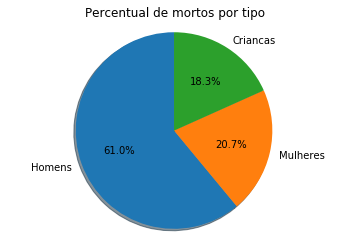

In [36]:
# Houve mais mortes de homens, mulheres ou crianças? 
# A partir do gráfico abaixo, observamos que morreram mais homens, seguindo das mulheres e crianças. Devido, principalmente, pelo fato de mulheres e crianças terem preferência de sobrevivência

x = migrantes.groupby('ANO_INCIDENTE').sum()
x = x.reset_index()

labels = ['Homens','Mulheres','Criancas']
sizes = [sum(x.QTDE_HOMENS),sum(x.QTDE_MULHERES),sum(x.QTDE_CRIANCAS)]

fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Percentual de mortos por tipo")
plt.show()

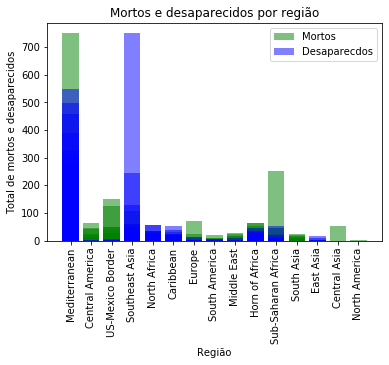

In [13]:
# Houve mais mortos ou desaparecidos?
# De acordo com o grafico, houve mais mortos no mediterrâneo e mais desaparecidos no sudeste da Ásia

plt.xticks(rotation=90)
plt.bar(migrantes.REGIAO_INCIDENTE,migrantes.TOTAL_MIGRANTES_MORTOS,color='green', label='Mortos', alpha=0.5)
plt.bar(migrantes.REGIAO_INCIDENTE,migrantes.TOTAL_MIGRANTES_DESAPARECIDOS,color='blue',label='Desaparecdos', alpha=0.5)

plt.xlabel("Região")
plt.ylabel("Total de mortos e desaparecidos")
plt.title("Mortos e desaparecidos por região")
plt.legend()

Text(0, 0.5, 'Total de fatalidade')

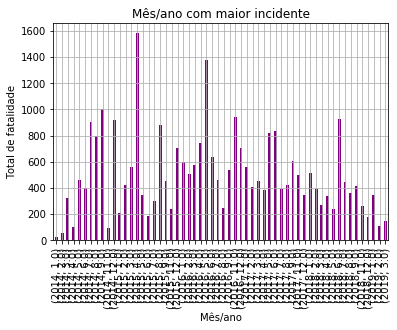

In [38]:
# Total de mortos e desaparecidos por mes/ano
# De acordo com o gráfico, abril de 2015 foi o mês/ano com mais mortos e desaparecidos, 1583.

x = migrantes.groupby(['ANO_INCIDENTE','MES_INCIDENTE']).sum()
#x = x.reset_index()
#print (x)

x['TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS'].plot(kind = 'bar',color='purple', title='Mês/ano com maior incidente',grid=True, stacked=True)
plt.xlabel("Mês/ano")
plt.ylabel("Total de fatalidade")

Text(0, 0.5, 'Total de fatalidade')

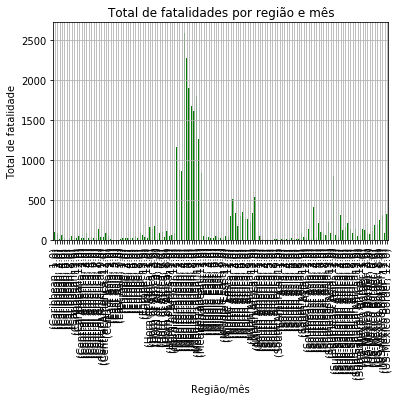

In [39]:
# Total de fatalidades por região e mês
# Confirmando a análise da região do Mediterraneo, com a maior quantidade de mortes e/ou desaparecidos, o mês de abril teve 2595 mortos e/ou desaparecidos

x = migrantes.groupby(['REGIAO_INCIDENTE','MES_INCIDENTE']).sum()

x['TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS'].plot(kind = 'bar',color='green', title='Total de fatalidades por região e mês',grid=True, stacked=True)
plt.xlabel("Região/mês")
plt.ylabel("Total de fatalidade")

Text(0, 0.5, 'Qtde de homens')

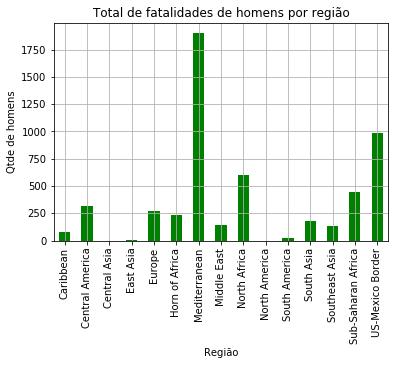

In [40]:
# Homens mortos e desaparecidos por região
# Conforme visualizamos no gráfico abaixo, a maior parte dos incidentes com homens, aconteceu no Mediterrâneo

x = migrantes.groupby(['REGIAO_INCIDENTE']).sum()

x['QTDE_HOMENS'].plot(kind = 'bar',color='green', title='Total de fatalidades de homens por região',grid=True, stacked=True)
plt.xlabel("Região")
plt.ylabel("Qtde de homens")

Text(0, 0.5, 'Qtde de crianças')

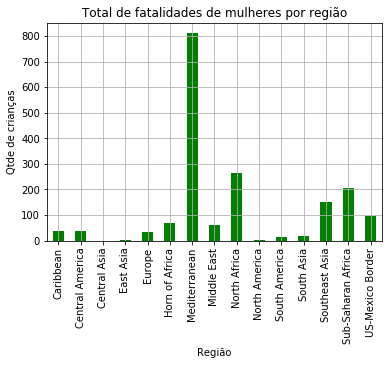

In [41]:
# Mulheres mortas e desaparecidas por região
# Conforme visualizamos no gráfico abaixo, a maior parte dos incidentes com mulheres, aconteceu no Mediterrâneo

x = migrantes.groupby(['REGIAO_INCIDENTE']).sum()

x['QTDE_MULHERES'].plot(kind = 'bar',color='green', title='Total de fatalidades de mulheres por região',grid=True, stacked=True)
plt.xlabel("Região")
plt.ylabel("Qtde de crianças")

Text(0, 0.5, 'Qtde de crianças')

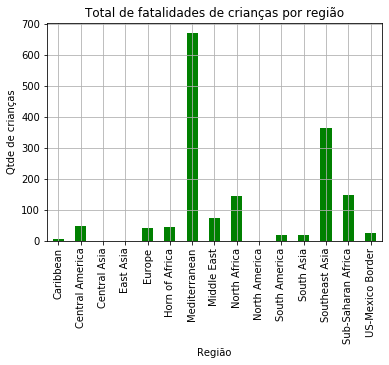

In [42]:
# Crianças mortas e desaparecidas por região
# Conforme visualizamos no gráfico abaixo, a maior parte dos incidentes com crianças, aconteceu no Mediterrâneo

x = migrantes.groupby(['REGIAO_INCIDENTE']).sum()

x['QTDE_CRIANCAS'].plot(kind = 'bar',color='green', title='Total de fatalidades de crianças por região',grid=True, stacked=True)
plt.xlabel("Região")
plt.ylabel("Qtde de crianças")

Text(0, 0.5, 'Fatalidade')

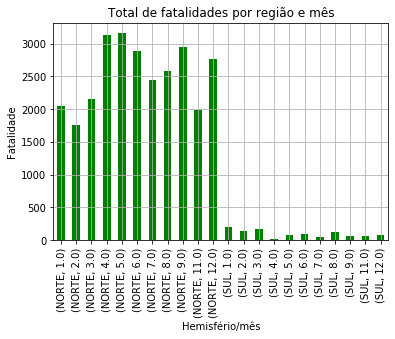

In [43]:
# Total de fatalidades por hemifério e mês
# Confirmando a análise da região do Mediterraneo, com a maior quantidade de mortes e/ou desaparecidos, o mês de abril teve 2595 mortos e/ou desaparecidos

x = migrantes.groupby(['HEMISFERIO','MES_INCIDENTE']).sum()

x['TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS'].plot(kind = 'bar',color='green', title='Total de fatalidades por região e mês',grid=True, stacked=True)
plt.xlabel("Hemisfério/mês")
plt.ylabel("Fatalidade")

In [44]:
# Mortos e desaparecidos por hemisfério
# Conforme visualizamos o gráfico abaixo, quase todos os mortos e desaparecidos estão no hemisfério norte

x = migrantes.groupby(['HEMISFERIO']).sum()

x['TOTAL_MIGRANTES_MORTOS_DESAPARECIDOS'].plot(kind = 'bar',color='green', title='Total de fatalidades por hemisfério',grid=True, stacked=True)
plt.xlabel("Hemisfério")
plt.ylabel("Total de fatalidade")

Text(0, 0.5, 'Total de fatalidade')

#### 4.3) **(20%)** Análise 3 - Correlação entre variáveis

O aluno deve apresentar 3 análises de correlação entre variáveis do conjunto de dados trabalhado. Exemplo: Em um conjunto de dados com as informações de temperatura e ocorrência de incêndios, eu gostaria de saber a incidência de correlação entre as duas variáveis.



In [ ]:
# Primeiro par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.
Observamos que a maior da imigrações ocorreram no hemisfério norte, onde se concentra grande parte dos mortos e desaparecidos.


In [ ]:
# Segundo par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.
É no Mediterrâneo, que fica no hemisfério norte, que ocorreu a maior parte das mortes, sendo a maioria de homens, devido principalmente a prioridade de mulheres e crianças em acidentes.
A maioria dos mortos é de imigrantes ilegais, ocorridas entre 2014 e 2016. Boa parte de Sírios, tentando fugir da crise na região. A travessia era feita em embarcações precárias, super lotadas e sem equipamentos de segurança. 

In [ ]:
# Terceiro par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.
A maior parte das fatalidades ocorreu entre os meses de abril a setembro, época de chuvas no hemisfério norte. 

### 5) Conclusões **15%**

*O que é possível concluir com os dados que você analisou? Se fosse fazer uma apresentação, o que levaria como os maiores destaques e por que?*

A maioria das fatalidades que acontecem no mundo, são no hemisfério norte, quando os imigrantes tentavam entrar na europa, através do mediterrâneo, durante a época de chuva. Sabemos que quando há crises internas graves em qualquer país, muitas pessoas tentam migrar para outros país, poranto, as autoridades dos paises vizinhos, devem redobrar a atenção, seja através do mar ou por terra, evitando acidentes e mortes.
Observamos que em 61% dos incidentes, houve pelo menos 1 migrante morto ou desaparecido e 12% houve 2 mortos e/ou desaparecidos